## Introduction

Dataset: Summary for Project Paris Olympics 2024

Scenarios

	1.	Scenario 1: Prove that if GDP affects the total medals won by a country.

	2.	Scenario 2: Assess if the number of athletes participating from each country affects the number of medals won.
  
  ### The study uses three primary datasets for the case study and one additional dataset for normalization purposes.

  Datasets:

	1.	GDP Data: Contains information on the GDP of each participating country - Scrapping
	2.	Medals Data: Lists the total medals won by each country -  API
	3.	Athletes Data: Provides the number of athletes participating from each country - Scrapping
	4.	Normalization Dataset: Used for data normalization and transformation to ensure consistency and comparability across different scales - Scrapping


  <!-- - Population by Medals -  later if we got time -->



## Importing Neccesary Libraries

In [ ]:
%matplotlib inline

import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
mpl.style.use('ggplot') # optional: for ggplot-like style


In [ ]:
!pip install googletrans==4.0.0-rc1

## Consuming Exerneal API's and Scrapping Data

### Consuming The Codante.io Olympic Games API to get Updated Medals Won by Country

In [ ]:
data_list = []

# Loop through pages 1 to 5
for page in range(1, 5 + 1):
    url = f'https://apis.codante.io/olympic-games/countries?page={page}'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        data_list.extend(data['data'])


# to a CSV file
# medals_df.to_csv('country_by_medals.csv', index=False)

In [ ]:
medals_df = pd.DataFrame(data_list)

medals_df.shape

(203, 10)

### Scrapping List of Countries by Code to Match Data With Different Country Name using beautifulsoup

In [ ]:

ctry_by_code_url = "https://en.wikipedia.org/wiki/List_of_IOC_country_codes"

ctry_by_code= requests.get(ctry_by_code_url).text
ctry_by_code_soup = BeautifulSoup(ctry_by_code,'html.parser')

by_code_table = ctry_by_code_soup.find_all('table')[0]
by_code_rows = by_code_table.findAll("tr")[3:]

ctry_by_code_data = []

for row in by_code_rows:
    by_code_row_data = []
    for cell in row.find_all('td')[0:2]:
        by_code_row_data.append(cell.text.strip())
    ctry_by_code_data.append(by_code_row_data)

cols =  ['code','country']
ctry_by_code = pd.DataFrame(ctry_by_code_data,columns=cols)
ctry_by_code.replace("—",np.nan,inplace=True)
ctry_by_code.isnull().sum()

ctry_by_code.dropna(inplace=True)
ctry_by_code.to_csv("country_codes.csv",index=False)

### Scrapping List of Countries by GDP using beautifulsoup

In [ ]:

gdp_by_ctry_url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"

gdp_by_ctry = requests.get(gdp_by_ctry_url).text
gdp_soup = BeautifulSoup(gdp_by_ctry, 'html.parser')

gdp_table = gdp_soup.find_all('table')[2]
gdp_rows = gdp_table.findAll("tr")[3:]

gdp_data = []

for row in gdp_rows:
    gdp_row_data = []
    for cell in row.find_all('td')[0:2]:
        gdp_row_data.append(cell.text.strip())
    gdp_data.append(gdp_row_data)

# gdp_data

cols =  ['country','imf_gdp_est']
ctry_gdp = pd.DataFrame(gdp_data,columns=cols)
ctry_gdp.replace("—",np.nan,inplace=True)
ctry_gdp.shape

ctry_gdp.dropna(inplace=True)
ctry_gdp.to_csv("country_gdp.csv",index=False)

In [ ]:
ctry_gdp_df = pd.read_csv("/content/country_gdp.csv")
ctry_gdp_df.shape

(194, 2)

In [ ]:
ctry_gdp.shape

(194, 2)

In [ ]:
ctry_gdp["imf_gdp_est"].isnull().sum()

0

In [ ]:
ctry_gdp.dropna(inplace=True)
ctry_gdp["imf_gdp_est"].isnull().sum()
ctry_gdp.duplicated().sum()


0

### Scraping Number of Athletes in each Country in Paris Olypics 2024 using beautifulsoup

In [ ]:
num_athl_by_ctry_url = "https://en.wikipedia.org/wiki/2024_Summer_Olympics"

total_medals_by_ctry = requests.get(num_athl_by_ctry_url).text
soup = BeautifulSoup(total_medals_by_ctry, 'html.parser')

last_table = soup.find_all('table')[10]
rows = last_table.findAll("tr")

data = []
for row in rows:
    row_data = []
    for cell in row.find_all('td'):
        row_data.append(cell.text.strip())
    data.append(row_data)

country_atl = pd.DataFrame(data,columns=['rank','country','athletes'])
country_atl.dropna(inplace=True)
country_atl.drop(columns=["rank"],axis=1,inplace=True)
country_atl.to_csv("country_atl.csv")

In [ ]:

ctry_atl_df = pd.read_csv("/content/country_atl.csv")
ctry_atl_df.shape

(206, 3)

## Data Wrangling and Transformation

## Wrangling and Transforming Medals by Country Dataframe

In [ ]:
medals_df.isnull().sum()

,0
id,0
name,0
continent,0
flag_url,0
gold_medals,0
silver_medals,0
bronze_medals,0
total_medals,0
rank,0
rank_total_medals,0


In [ ]:
medals_df.duplicated().sum()

0

In [ ]:
#drop columns from the dataframe
medals_df = medals_df.drop(['flag_url'], axis=1)

In [ ]:
#change name of columns
medals_df = medals_df.rename(columns={'id':'code','name': 'country', 'continent': 'continents'})

medals_df.head()

,code,country,continents,gold_medals,silver_medals,bronze_medals,total_medals,rank,rank_total_medals
0,CHN,China,ASI,13,7,7,27,1,3
1,USA,EUA,AME,9,17,15,41,2,1
2,GBR,Grã-Bretanha,EUR,9,8,8,25,3,4
3,FRA,França,EUR,8,11,11,30,4,2
4,AUS,Austrália,OCE,8,6,5,19,5,5


In [ ]:
#check for null values
medals_df.isnull().sum()

,0
code,0
country,0
continents,0
gold_medals,0
silver_medals,0
bronze_medals,0
total_medals,0
rank,0
rank_total_medals,0


In [ ]:
# Use a translation library or API to translate French text to English
# using googletrans:

from googletrans import Translator

translator = Translator()
translation = translator.translate('Hello, world!', dest='fr')
print(translation.text)

Bonjour le monde!


In [ ]:

def translate_to_english(french_text):
  translator = Translator()
  translation = translator.translate(french_text, dest='en')
  return translation.text

# Replace french language in dataframe to english

medals_df['country'] = medals_df['country'].apply(lambda x: translate_to_english(x))

In [ ]:
medals_df.head()

,code,country,continents,gold_medals,silver_medals,bronze_medals,total_medals,rank,rank_total_medals
0,CHN,China,ASI,13,7,7,27,1,3
1,USA,USA,AME,9,17,15,41,2,1
2,GBR,Great Britain,EUR,9,8,8,25,3,4
3,FRA,France,EUR,8,11,11,30,4,2
4,AUS,Australia,OCE,8,6,5,19,5,5


## Wrangling and Transforming Country by Num of Athletes Dataframe

In [ ]:
ctry_atl_df.isnull().sum()
ctry_atl_df.duplicated().sum()

0

## Final Transformation - Joining 3 Clean Datasets


In [ ]:
# medals_df.shape
# ctry_atl_df.shape
# ctry_by_code.shape
ctry_gdp_df.head()

,country,imf_gdp_est
0,United States,"28,781,083"
1,China,"18,532,633"
2,Germany,"4,591,100"
3,Japan,"4,110,452"
4,India,"3,937,011"


### Joining Country by Num of Athletes Dataframe and  Medals by Country Dataframes

In [ ]:
merged_ctry_atl_ctry_code_df = pd.merge(ctry_by_code,ctry_atl_df,how="inner",on=["country"])
# merged_ctry_atl_ctry_code_df.head()
# merged_ctry_atl_ctry_code_df.shape

In [ ]:
merged_ctry_gdp_ctry_code_df = pd.merge(ctry_by_code,ctry_gdp_df,how="inner",on=["country"])
# merged_ctry_gdp_ctry_code_df.head()
# merged_ctry_gdp_ctry_code_df.shape

In [ ]:
merged_ctry_gdp_ctry_atl_count = pd.merge(merged_ctry_atl_ctry_code_df,merged_ctry_gdp_ctry_code_df,how="inner",on=["code"])

# merged_ctry_gdp_ctry_atl_count.head()
merged_ctry_gdp_ctry_atl_count.shape


(182, 6)

### Merging All datasets

In [ ]:
df = pd.merge(merged_ctry_gdp_ctry_atl_count,medals_df,how="inner",on=["code"])
df.reset_index(drop=True, inplace=True)

In [ ]:
df.drop(columns=["country_x", "Unnamed: 0","country"],inplace=True)
df.rename(columns={"country_y":"country"},inplace=True)

In [ ]:
df.sample(10)

,code,athletes,country,imf_gdp_est,continents,gold_medals,silver_medals,bronze_medals,total_medals,rank,rank_total_medals
106,MNE,19,Montenegro,8010.0,EUR,0,0,0,0,0,0
98,MAW,3,Malawi,11241.0,AFR,0,0,0,0,0,0
83,KOR,141,South Korea,1760947.0,ASI,7,4,4,15,7,8
7,AUS,460,Australia,1790348.0,OCE,8,6,5,19,5,5
5,ARM,15,Armenia,25408.0,EUR,0,0,0,0,0,0
81,KGZ,16,Kyrgyzstan,13599.0,ASI,0,0,0,0,0,0
97,MAS,26,Malaysia,445519.0,ASI,0,0,0,0,0,0
124,PER,26,Peru,282458.0,AME,0,0,0,0,0,0
169,UKR,140,Ukraine,188943.0,EUR,0,1,1,2,38,31
91,LBR,8,Liberia,4754.0,AFR,0,0,0,0,0,0


### Fixing Country column by Medals Won by Country Dataframe showing United States as USA to match other dataframes

In [ ]:
null_rank_df = df[df['rank'].isnull()]
null_rank_df

,code,athletes,country,imf_gdp_est,continents,gold_medals,silver_medals,bronze_medals,total_medals,rank,rank_total_medals


In [ ]:
df[df["country"].str.startswith("U")]

,code,athletes,country,imf_gdp_est,continents,gold_medals,silver_medals,bronze_medals,total_medals,rank,rank_total_medals
167,UAE,13,United Arab Emirates,"527,796",ASI,0,0,0,0,0,0
168,UGA,24,Uganda,"56,310",AFR,0,0,0,0,0,0
169,UKR,140,Ukraine,"188,943",EUR,0,1,1,2,38,31
170,URU,25,Uruguay,"82,605",AME,0,0,0,0,0,0
171,USA,592,United States,"28,781,083",AME,9,17,15,41,2,1
172,UZB,86,Uzbekistan,"97,956",ASI,1,0,1,2,27,31


In [ ]:
#Change String GDP to Number
df["imf_gdp_est"] = df["imf_gdp_est"].str.replace(',', '').astype(float)
df["total_medals"] = df["total_medals"].astype(int)

## Data Exploration

In [ ]:
df.shape

(180, 11)

In [ ]:
df[["athletes","total_medals","imf_gdp_est"]].corr()

,athletes,total_medals,imf_gdp_est
athletes,1.000000,0.877616,0.639499
total_medals,0.877616,1.000000,0.809229
imf_gdp_est,0.639499,0.809229,1.000000


In [ ]:
top_ctry_by_medals_df = df.sort_values("total_medals",ascending=False)
top_ctry_by_medals_df

,code,athletes,country,imf_gdp_est,continents,gold_medals,silver_medals,bronze_medals,total_medals,rank,rank_total_medals
171,USA,592,United States,28781083.0,AME,9,17,15,41,2,1
52,FRA,573,France,3130014.0,EUR,8,11,11,30,4,2
31,CHN,388,China,18532633.0,ASI,13,7,7,27,1,3
7,AUS,460,Australia,1790348.0,OCE,8,6,5,19,5,5
75,ITA,371,Italy,2328028.0,EUR,5,8,4,17,8,6
...,...,...,...,...,...,...,...,...,...,...,...
72,IRQ,22,Iraq,265894.0,ASI,0,0,0,0,0,0
73,ISL,5,Iceland,33338.0,EUR,0,0,0,0,0,0
76,JAM,58,Jamaica,20098.0,AME,0,0,0,0,0,0
77,JOR,12,Jordan,53570.0,ASI,0,0,0,0,0,0


### Correlation between GDP and Total Medals  Using Matplotlib Scatter Plot with Regression Line

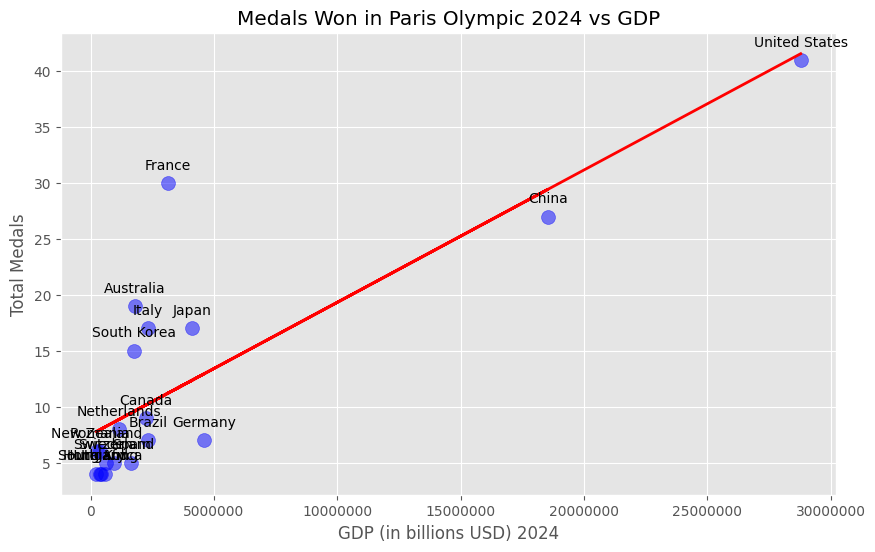

In [ ]:
# Calculate the line of best fit

top_20_df = top_ctry_by_medals_df.head(20)

slope, intercept = np.polyfit(top_20_df['imf_gdp_est'], top_20_df['total_medals'], 1)
line = slope * top_20_df['imf_gdp_est'] + intercept

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(top_20_df['imf_gdp_est'], top_20_df['total_medals'], color='blue', s=100, alpha=0.5)
plt.plot(top_20_df['imf_gdp_est'], line, color='red', linewidth=2)
plt.title('Medals Won in Paris Olympic 2024 vs GDP')
plt.xlabel('GDP (in billions USD) 2024')
plt.ylabel('Total Medals')
plt.ticklabel_format(style='plain', axis='x')

plt.grid(True)

# Annotate points
for i, row in top_20_df.iterrows():
    plt.annotate(row['country'], (row['imf_gdp_est'], row['total_medals']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

### Proving that - The Higher the GDP of the Country the more Medals they Won using Seaborn Regression Plot

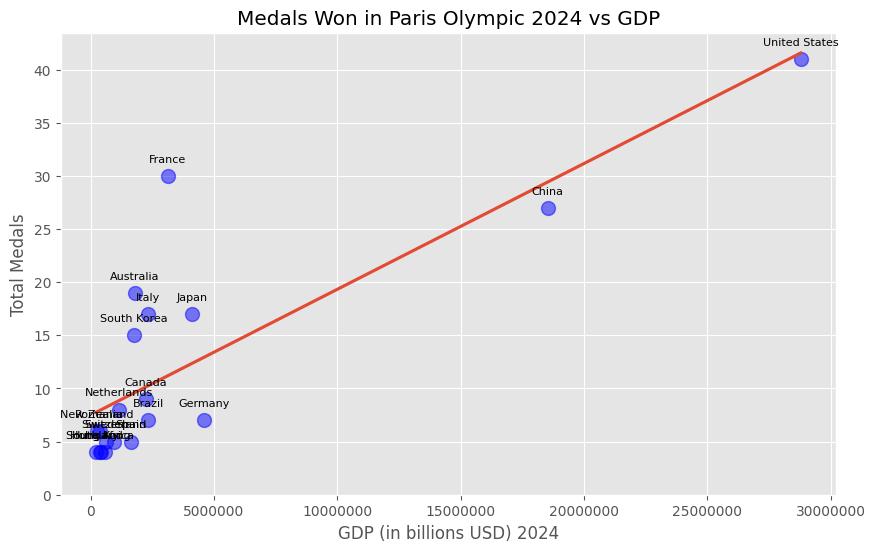

In [ ]:
plt.figure(figsize=(10, 6))

sns.regplot(x='imf_gdp_est', y='total_medals', data=top_20_df, ci=False, scatter_kws={'s':100,'alpha':0.5,'color':'b'})

plt.title('Medals Won in Paris Olympic 2024 vs GDP')
plt.xlabel('GDP (in billions USD) 2024')
plt.ylabel('Total Medals')
plt.ticklabel_format(style='plain', axis='x')
plt.ylim(ymin=0)


#Annotate points
for i, row in top_20_df.iterrows():
    plt.annotate(row['country'], (row['imf_gdp_est'], row['total_medals']), textcoords="offset points", xytext=(0,10), fontsize=8, ha='center')

plt.show()

### Proving that - The Higher the Number of Athlethes Participated the Olympics  the more Medals they Won. using Seaborn Regression Plot

In [ ]:
top_ctry_by_num_of_atl_df = df = df.sort_values("athletes",ascending=False)
top_ctry_by_num_of_atl_df

,code,athletes,country,imf_gdp_est,continents,gold_medals,silver_medals,bronze_medals,total_medals,rank,rank_total_medals
171,USA,592,United States,28781083.0,AME,9,17,15,41,2,1
52,FRA,573,France,3130014.0,EUR,8,11,11,30,4,2
7,AUS,460,Australia,1790348.0,OCE,8,6,5,19,5,5
57,GER,428,Germany,4591100.0,EUR,2,3,2,7,11,11
78,JPN,403,Japan,4110452.0,ASI,8,3,6,17,6,6
...,...,...,...,...,...,...,...,...,...,...,...
1,AND,2,Andorra,3897.0,EUR,0,0,0,0,0,0
166,TUV,2,Tuvalu,66.0,OCE,0,0,0,0,0,0
18,BIZ,1,Belize,3296.0,AME,0,0,0,0,0,0
118,NRU,1,Nauru,161.0,OCE,0,0,0,0,0,0


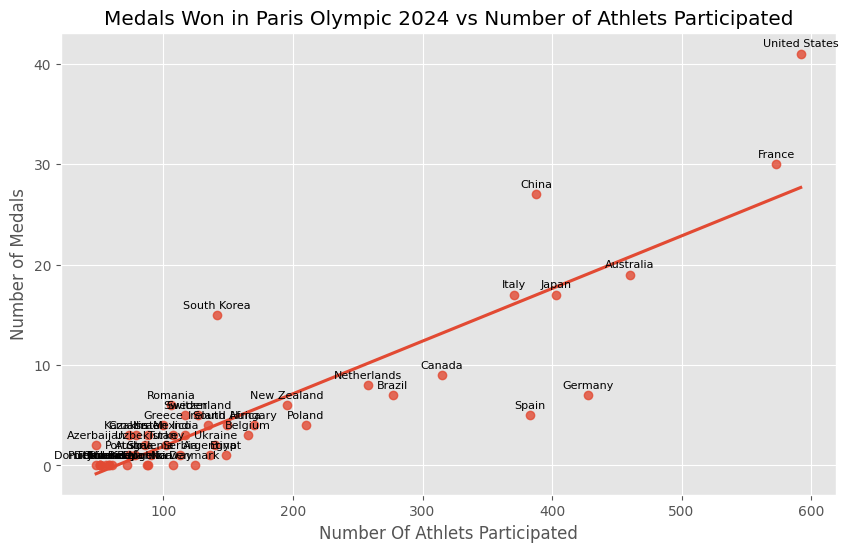

In [ ]:
plt.figure(figsize=(10, 6))

top_50_by_atl = top_ctry_by_num_of_atl_df.head(50)

sns.regplot(x='athletes', y='total_medals', data=top_50_by_atl,ci=False)

plt.title('Medals Won in Paris Olympic 2024 vs Number of Athlets Participated')

plt.xlabel('Number Of Athlets Participated')

plt.ylabel('Number of Medals')

plt.ticklabel_format(style='plain', axis='x')

#Annotate points
for i, row in top_50_by_atl.iterrows():
    plt.annotate(row['country'], (row['athletes'], row['total_medals']), textcoords="offset points", xytext=(0,5), fontsize=8, ha='center')

plt.show()


## Thank you


Datasets used

United States at the 2024 Summer Olympics - Wikipedia​

https://en.wikipedia.org/wiki/List_of_IOC_country_codes​

https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)​

https://en.wikipedia.org/wiki/2024_Summer_Olympics​